In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import logging

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset']
    test_labels = tmp_save['labels']
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (31402, 56, 56) (31402,)
Validation set (2000, 56, 56) (2000,)
Test set (13068, 56, 56) (13068,)


In [5]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (30041, 56, 56) (30041,)
Validation set (1917, 56, 56) (1917,)
Test set (12920, 56, 56) (12920,)


Labels [1 1]
Dtype float32
Shape (56, 56)
Color range -0.524486 0.5


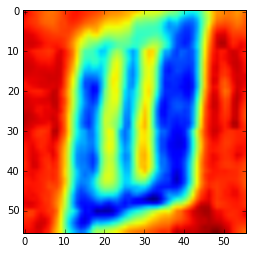

Labels [1 7 7]
Dtype float32
Shape (56, 56)
Color range -0.524702 0.5


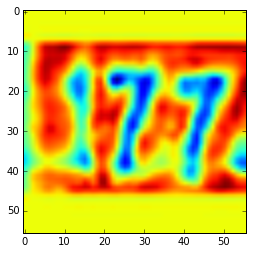

Labels [4]
Dtype float32
Shape (56, 56)
Color range -0.497002 0.5


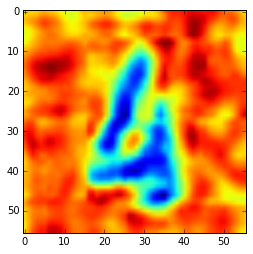

Labels [4]
Dtype float32
Shape (56, 56)
Color range -0.519046 0.5


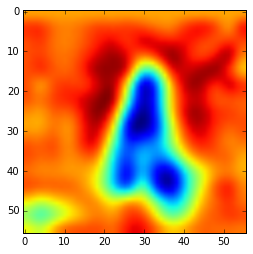

Labels [3]
Dtype float32
Shape (56, 56)
Color range -0.505291 0.5


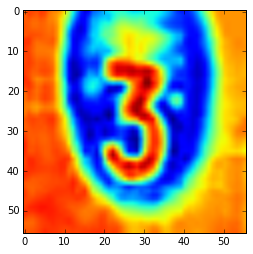

Labels [2 7]
Dtype float32
Shape (56, 56)
Color range -0.552833 0.5


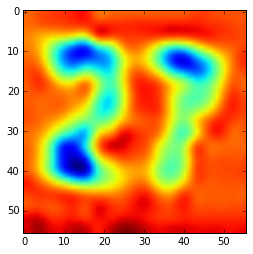

In [6]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [7]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (30041, 56, 56, 1) (30041, 3, 11)
Validation set (1917, 56, 56, 1) (1917, 3, 11)
Test set (12920, 56, 56, 1) (12920, 3, 11)


In [8]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (30041, 28, 28, 1) (30041, 3, 11)
Validation set (1917, 28, 28, 1) (1917, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [9]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [10]:
train_dataset, valid_dataset, test_dataset = dataset_28

def run(graph_config):
    graph = create_graph(num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, num_digits, train_dataset, train_labels, valid_labels, test_labels, mins=30)
    return graph

In [11]:
graph = run({})

Initialized
Elapsed time(s):37/1800 (0.02%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.740478
Minibatch accuracy: 41.7%
Validation accuracy: 41.8%
Elapsed time(s):77/1800 (0.04%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.671430
Minibatch accuracy: 45.3%
Validation accuracy: 47.1%
Elapsed time(s):116/1800 (0.06%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.462348
Minibatch accuracy: 52.6%
Validation accuracy: 52.1%
Elapsed time(s):155/1800 (0.09%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.394239
Minibatch accuracy: 55.7%
Validation accuracy: 55.4%
Elapsed time(s):193/1800 (0.11%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.234925
Minibatch accuracy: 64.1%
Validation accuracy: 59.6%
Elapsed time(s):231/1800 (0.13%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.123077
Minibatch accuracy: 65.6%
Validation accuracy: 62.4%
Elapsed time(s):269/1800 (0.15%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.016752
Mi

In [12]:
graph = run({'use_dropout':True})

Initialized
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.767643
Minibatch accuracy: 40.6%
Validation accuracy: 41.2%
Elapsed time(s):73/1800 (0.04%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.729799
Minibatch accuracy: 45.8%
Validation accuracy: 45.2%
Elapsed time(s):110/1800 (0.06%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.550642
Minibatch accuracy: 49.0%
Validation accuracy: 49.5%
Elapsed time(s):148/1800 (0.08%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.499314
Minibatch accuracy: 54.2%
Validation accuracy: 52.4%
Elapsed time(s):186/1800 (0.10%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.308582
Minibatch accuracy: 56.8%
Validation accuracy: 55.9%
Elapsed time(s):223/1800 (0.12%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.295610
Minibatch accuracy: 65.1%
Validation accuracy: 58.3%
Elapsed time(s):261/1800 (0.15%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.091262
Mi

In [13]:
graph = run({'use_dropout':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.100517
Minibatch accuracy: 75.0%
Validation accuracy: 60.7%
Elapsed time(s):72/1800 (0.04%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.030023
Minibatch accuracy: 83.3%
Validation accuracy: 67.7%
Elapsed time(s):110/1800 (0.06%)
Learning rate: 0.496131
Minibatch loss at step 1500: 0.880550
Minibatch accuracy: 83.9%
Validation accuracy: 68.4%
Elapsed time(s):147/1800 (0.08%)
Learning rate: 0.494849
Minibatch loss at step 2000: 0.779146
Minibatch accuracy: 83.3%
Validation accuracy: 71.7%
Elapsed time(s):185/1800 (0.10%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.634575
Minibatch accuracy: 92.7%
Validation accuracy: 73.9%
Elapsed time(s):222/1800 (0.12%)
Learning rate: 0.492295
Minibatch loss at step 3000: 0.609817
Minibatch accuracy: 94.3%
Validation accuracy: 74.1%
Elapsed time(s):260/1800 (0.14%)
Learning rate: 0.491022
Minibatch loss at step 3500: 0.566917
Minibatch

In [14]:
graph = run({'use_dropout':True,
             'learning_decay':0.2})

Initialized
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.0495985
Minibatch loss at step 500: 1.718471
Minibatch accuracy: 40.6%
Validation accuracy: 41.9%
Elapsed time(s):72/1800 (0.04%)
Learning rate: 0.0492009
Minibatch loss at step 1000: 1.707332
Minibatch accuracy: 47.9%
Validation accuracy: 46.0%
Elapsed time(s):110/1800 (0.06%)
Learning rate: 0.0488066
Minibatch loss at step 1500: 1.565058
Minibatch accuracy: 49.5%
Validation accuracy: 51.0%
Elapsed time(s):147/1800 (0.08%)
Learning rate: 0.0484154
Minibatch loss at step 2000: 1.414060
Minibatch accuracy: 55.7%
Validation accuracy: 54.4%
Elapsed time(s):185/1800 (0.10%)
Learning rate: 0.0480274
Minibatch loss at step 2500: 1.246024
Minibatch accuracy: 63.5%
Validation accuracy: 58.1%
Elapsed time(s):223/1800 (0.12%)
Learning rate: 0.0476424
Minibatch loss at step 3000: 1.180047
Minibatch accuracy: 68.2%
Validation accuracy: 60.8%
Elapsed time(s):260/1800 (0.14%)
Learning rate: 0.0472606
Minibatch loss at step 3500: 1.096994
M

In [15]:
graph = run({'use_dropout':True,
             'learning_rate':0.5,
             'learning_decay':0.2})

Initialized
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.495985
Minibatch loss at step 500: 1.136366
Minibatch accuracy: 74.0%
Validation accuracy: 60.5%
Elapsed time(s):73/1800 (0.04%)
Learning rate: 0.492009
Minibatch loss at step 1000: 1.039854
Minibatch accuracy: 81.8%
Validation accuracy: 67.7%
Elapsed time(s):111/1800 (0.06%)
Learning rate: 0.488066
Minibatch loss at step 1500: 0.742254
Minibatch accuracy: 87.5%
Validation accuracy: 70.7%
Elapsed time(s):149/1800 (0.08%)
Learning rate: 0.484154
Minibatch loss at step 2000: 0.791641
Minibatch accuracy: 88.5%
Validation accuracy: 72.3%
Elapsed time(s):187/1800 (0.10%)
Learning rate: 0.480274
Minibatch loss at step 2500: 0.627471
Minibatch accuracy: 90.1%
Validation accuracy: 73.2%
Elapsed time(s):225/1800 (0.13%)
Learning rate: 0.476424
Minibatch loss at step 3000: 0.649922
Minibatch accuracy: 90.6%
Validation accuracy: 73.7%
Elapsed time(s):263/1800 (0.15%)
Learning rate: 0.472606
Minibatch loss at step 3500: 0.445078
Minibatc

In [16]:
graph = run({'use_dropout':True,
             'learning_rate':.4})

Initialized
Elapsed time(s):35/1800 (0.02%)
Learning rate: 0.398964
Minibatch loss at step 500: 1.191819
Minibatch accuracy: 67.7%
Validation accuracy: 56.1%
Elapsed time(s):73/1800 (0.04%)
Learning rate: 0.397933
Minibatch loss at step 1000: 1.090819
Minibatch accuracy: 76.6%
Validation accuracy: 65.1%
Elapsed time(s):111/1800 (0.06%)
Learning rate: 0.396905
Minibatch loss at step 1500: 0.834125
Minibatch accuracy: 88.0%
Validation accuracy: 67.0%
Elapsed time(s):149/1800 (0.08%)
Learning rate: 0.395879
Minibatch loss at step 2000: 0.879240
Minibatch accuracy: 81.8%
Validation accuracy: 70.9%
Elapsed time(s):187/1800 (0.10%)
Learning rate: 0.394856
Minibatch loss at step 2500: 0.678619
Minibatch accuracy: 89.1%
Validation accuracy: 72.4%
Elapsed time(s):225/1800 (0.13%)
Learning rate: 0.393836
Minibatch loss at step 3000: 0.649069
Minibatch accuracy: 89.6%
Validation accuracy: 74.0%
Elapsed time(s):262/1800 (0.15%)
Learning rate: 0.392818
Minibatch loss at step 3500: 0.445961
Minibatc

In [17]:
graph = run({'use_dropout':True,
             'use_max_pool':True})

Initialized
Elapsed time(s):30/1800 (0.02%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.764739
Minibatch accuracy: 42.2%
Validation accuracy: 41.1%
Elapsed time(s):63/1800 (0.04%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.677750
Minibatch accuracy: 49.0%
Validation accuracy: 45.0%
Elapsed time(s):95/1800 (0.05%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.504028
Minibatch accuracy: 53.6%
Validation accuracy: 51.1%
Elapsed time(s):128/1800 (0.07%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.441951
Minibatch accuracy: 55.7%
Validation accuracy: 55.1%
Elapsed time(s):161/1800 (0.09%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.214557
Minibatch accuracy: 66.1%
Validation accuracy: 60.1%
Elapsed time(s):194/1800 (0.11%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.123844
Minibatch accuracy: 68.8%
Validation accuracy: 63.8%
Elapsed time(s):226/1800 (0.13%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 1.005226
Min

In [18]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.5})

Initialized
Elapsed time(s):30/1800 (0.02%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.030993
Minibatch accuracy: 73.4%
Validation accuracy: 62.0%
Elapsed time(s):62/1800 (0.03%)
Learning rate: 0.497417
Minibatch loss at step 1000: 0.993048
Minibatch accuracy: 78.6%
Validation accuracy: 69.1%
Elapsed time(s):95/1800 (0.05%)
Learning rate: 0.496131
Minibatch loss at step 1500: 0.673718
Minibatch accuracy: 85.9%
Validation accuracy: 73.0%
Elapsed time(s):128/1800 (0.07%)
Learning rate: 0.494849
Minibatch loss at step 2000: 0.777039
Minibatch accuracy: 88.0%
Validation accuracy: 75.8%
Elapsed time(s):160/1800 (0.09%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.626143
Minibatch accuracy: 91.1%
Validation accuracy: 77.3%
Elapsed time(s):193/1800 (0.11%)
Learning rate: 0.492295
Minibatch loss at step 3000: 0.619888
Minibatch accuracy: 90.1%
Validation accuracy: 77.3%
Elapsed time(s):225/1800 (0.13%)
Learning rate: 0.491022
Minibatch loss at step 3500: 0.399414
Minibatch 

In [19]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.75})

Initialized
Elapsed time(s):30/1800 (0.02%)
Learning rate: 0.748058
Minibatch loss at step 500: 0.936143
Minibatch accuracy: 78.1%
Validation accuracy: 65.1%
Elapsed time(s):62/1800 (0.03%)
Learning rate: 0.746125
Minibatch loss at step 1000: 0.834495
Minibatch accuracy: 85.4%
Validation accuracy: 71.4%
Elapsed time(s):95/1800 (0.05%)
Learning rate: 0.744197
Minibatch loss at step 1500: 0.688004
Minibatch accuracy: 89.1%
Validation accuracy: 71.6%
Elapsed time(s):127/1800 (0.07%)
Learning rate: 0.742274
Minibatch loss at step 2000: 0.687399
Minibatch accuracy: 89.6%
Validation accuracy: 75.5%
Elapsed time(s):160/1800 (0.09%)
Learning rate: 0.740355
Minibatch loss at step 2500: 0.600091
Minibatch accuracy: 88.5%
Validation accuracy: 76.2%
Elapsed time(s):192/1800 (0.11%)
Learning rate: 0.738442
Minibatch loss at step 3000: 0.646368
Minibatch accuracy: 89.6%
Validation accuracy: 76.0%
Elapsed time(s):225/1800 (0.13%)
Learning rate: 0.736534
Minibatch loss at step 3500: 0.414951
Minibatch

In [20]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25})

Initialized
Elapsed time(s):30/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.271660
Minibatch accuracy: 65.1%
Validation accuracy: 55.1%
Elapsed time(s):62/1800 (0.03%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.131619
Minibatch accuracy: 72.4%
Validation accuracy: 64.6%
Elapsed time(s):95/1800 (0.05%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.761878
Minibatch accuracy: 84.4%
Validation accuracy: 70.8%
Elapsed time(s):128/1800 (0.07%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.743751
Minibatch accuracy: 82.3%
Validation accuracy: 74.4%
Elapsed time(s):161/1800 (0.09%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.681796
Minibatch accuracy: 85.9%
Validation accuracy: 75.5%
Elapsed time(s):193/1800 (0.11%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.665749
Minibatch accuracy: 88.0%
Validation accuracy: 76.5%
Elapsed time(s):226/1800 (0.13%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.484254
Minibatch

In [21]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125})

Initialized
Elapsed time(s):30/1800 (0.02%)
Learning rate: 0.124676
Minibatch loss at step 500: 1.575359
Minibatch accuracy: 48.4%
Validation accuracy: 47.5%
Elapsed time(s):62/1800 (0.03%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.350377
Minibatch accuracy: 57.8%
Validation accuracy: 57.6%
Elapsed time(s):95/1800 (0.05%)
Learning rate: 0.124033
Minibatch loss at step 1500: 1.046801
Minibatch accuracy: 73.4%
Validation accuracy: 63.4%
Elapsed time(s):128/1800 (0.07%)
Learning rate: 0.123712
Minibatch loss at step 2000: 0.991521
Minibatch accuracy: 74.0%
Validation accuracy: 70.3%
Elapsed time(s):160/1800 (0.09%)
Learning rate: 0.123393
Minibatch loss at step 2500: 0.815784
Minibatch accuracy: 79.2%
Validation accuracy: 72.5%
Elapsed time(s):193/1800 (0.11%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.847877
Minibatch accuracy: 76.0%
Validation accuracy: 74.3%
Elapsed time(s):225/1800 (0.13%)
Learning rate: 0.122756
Minibatch loss at step 3500: 0.616697
Minibatch

In [22]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':128})

Initialized
Elapsed time(s):32/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.071228
Minibatch accuracy: 72.9%
Validation accuracy: 60.7%
Elapsed time(s):67/1800 (0.04%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.018519
Minibatch accuracy: 79.2%
Validation accuracy: 68.1%
Elapsed time(s):102/1800 (0.06%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.691133
Minibatch accuracy: 87.0%
Validation accuracy: 72.7%
Elapsed time(s):137/1800 (0.08%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.755285
Minibatch accuracy: 84.4%
Validation accuracy: 75.3%
Elapsed time(s):171/1800 (0.10%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.619070
Minibatch accuracy: 89.6%
Validation accuracy: 76.8%
Elapsed time(s):206/1800 (0.11%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.587573
Minibatch accuracy: 92.2%
Validation accuracy: 77.3%
Elapsed time(s):241/1800 (0.13%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.385038
Minibatc

In [23]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':32})

Initialized
Elapsed time(s):29/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.438785
Minibatch accuracy: 54.7%
Validation accuracy: 51.6%
Elapsed time(s):61/1800 (0.03%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.232441
Minibatch accuracy: 68.2%
Validation accuracy: 61.2%
Elapsed time(s):93/1800 (0.05%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.026749
Minibatch accuracy: 77.6%
Validation accuracy: 63.8%
Elapsed time(s):125/1800 (0.07%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.969298
Minibatch accuracy: 80.2%
Validation accuracy: 70.8%
Elapsed time(s):157/1800 (0.09%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.820322
Minibatch accuracy: 83.9%
Validation accuracy: 72.9%
Elapsed time(s):189/1800 (0.11%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.805807
Minibatch accuracy: 81.2%
Validation accuracy: 75.2%
Elapsed time(s):221/1800 (0.12%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.583636
Minibatch

In [24]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':256})

Initialized
Elapsed time(s):36/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.038221
Minibatch accuracy: 74.0%
Validation accuracy: 62.1%
Elapsed time(s):74/1800 (0.04%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.966907
Minibatch accuracy: 82.3%
Validation accuracy: 69.8%
Elapsed time(s):113/1800 (0.06%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.621766
Minibatch accuracy: 90.6%
Validation accuracy: 73.9%
Elapsed time(s):151/1800 (0.08%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.699387
Minibatch accuracy: 87.0%
Validation accuracy: 75.9%
Elapsed time(s):190/1800 (0.11%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.514582
Minibatch accuracy: 93.8%
Validation accuracy: 77.6%
Elapsed time(s):229/1800 (0.13%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.543821
Minibatch accuracy: 95.3%
Validation accuracy: 77.8%
Elapsed time(s):267/1800 (0.15%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.342936
Minibatc

In [25]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192})

Initialized
Elapsed time(s):34/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.056005
Minibatch accuracy: 74.0%
Validation accuracy: 59.3%
Elapsed time(s):71/1800 (0.04%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.901759
Minibatch accuracy: 78.1%
Validation accuracy: 68.7%
Elapsed time(s):107/1800 (0.06%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.788988
Minibatch accuracy: 84.4%
Validation accuracy: 72.6%
Elapsed time(s):144/1800 (0.08%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.712450
Minibatch accuracy: 84.9%
Validation accuracy: 75.4%
Elapsed time(s):180/1800 (0.10%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.564957
Minibatch accuracy: 92.7%
Validation accuracy: 77.1%
Elapsed time(s):217/1800 (0.12%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.568306
Minibatch accuracy: 92.7%
Validation accuracy: 78.3%
Elapsed time(s):253/1800 (0.14%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.357456
Minibatc

In [26]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

Initialized
Elapsed time(s):55/1800 (0.03%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.034342
Minibatch accuracy: 74.0%
Validation accuracy: 62.6%
Elapsed time(s):114/1800 (0.06%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.895108
Minibatch accuracy: 80.7%
Validation accuracy: 68.6%
Elapsed time(s):179/1800 (0.10%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.641043
Minibatch accuracy: 90.1%
Validation accuracy: 72.8%
Elapsed time(s):238/1800 (0.13%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.713265
Minibatch accuracy: 86.5%
Validation accuracy: 76.5%
Elapsed time(s):297/1800 (0.17%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.539361
Minibatch accuracy: 92.7%
Validation accuracy: 78.4%
Elapsed time(s):356/1800 (0.20%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.541283
Minibatch accuracy: 93.2%
Validation accuracy: 79.1%
Elapsed time(s):415/1800 (0.23%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.344376
Minibat

In [27]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

Initialized
Elapsed time(s):25/1800 (0.01%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.155217
Minibatch accuracy: 70.8%
Validation accuracy: 57.8%
Elapsed time(s):52/1800 (0.03%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.007519
Minibatch accuracy: 74.0%
Validation accuracy: 67.7%
Elapsed time(s):80/1800 (0.04%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.776800
Minibatch accuracy: 83.9%
Validation accuracy: 71.1%
Elapsed time(s):107/1800 (0.06%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.725751
Minibatch accuracy: 87.5%
Validation accuracy: 73.6%
Elapsed time(s):134/1800 (0.07%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.623424
Minibatch accuracy: 91.1%
Validation accuracy: 74.7%
Elapsed time(s):162/1800 (0.09%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.632692
Minibatch accuracy: 90.6%
Validation accuracy: 76.5%
Elapsed time(s):189/1800 (0.11%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.378785
Minibatch

In [28]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

Initialized
Elapsed time(s):31/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.042265
Minibatch accuracy: 73.4%
Validation accuracy: 61.2%
Elapsed time(s):65/1800 (0.04%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.986544
Minibatch accuracy: 77.1%
Validation accuracy: 69.3%
Elapsed time(s):99/1800 (0.06%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.659280
Minibatch accuracy: 87.0%
Validation accuracy: 72.7%
Elapsed time(s):132/1800 (0.07%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.712014
Minibatch accuracy: 87.0%
Validation accuracy: 75.3%
Elapsed time(s):166/1800 (0.09%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.579973
Minibatch accuracy: 92.2%
Validation accuracy: 76.8%
Elapsed time(s):200/1800 (0.11%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.524052
Minibatch accuracy: 92.2%
Validation accuracy: 77.2%
Elapsed time(s):234/1800 (0.13%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.348147
Minibatch

In [29]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})

Initialized
Elapsed time(s):43/1800 (0.02%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.044842
Minibatch accuracy: 73.4%
Validation accuracy: 62.1%
Elapsed time(s):90/1800 (0.05%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.898522
Minibatch accuracy: 81.2%
Validation accuracy: 70.9%
Elapsed time(s):137/1800 (0.08%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.632340
Minibatch accuracy: 87.5%
Validation accuracy: 74.9%
Elapsed time(s):184/1800 (0.10%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.685191
Minibatch accuracy: 88.5%
Validation accuracy: 76.1%
Elapsed time(s):231/1800 (0.13%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.506621
Minibatch accuracy: 93.2%
Validation accuracy: 77.7%
Elapsed time(s):277/1800 (0.15%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.548223
Minibatch accuracy: 93.8%
Validation accuracy: 78.2%
Elapsed time(s):323/1800 (0.18%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.348571
Minibatc